In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [108]:
df = pd.read_csv('funds_train.csv')

In [109]:
df.head()

,fund_id,fund_name,parent_company,fund_size,greatstone_return_rating,greatstone_risk_rating,fund_ratio_net_annual_expense,10_years_return_mean_annual_fund,10_years_return_fund,3_years_return_mean_annual_fund,...,portfolio_tech_allocation,10years_fund_std,portfolio_healthcare_allocation,portfolio_others,2010_return_category,years_down,3_years_return_category,5_years_beta_category,2018_return_fund,greatstone_rating
0,f2936057-6df5-4757-9dd5-409f11d981e8,AMG TimesSquare Mid Cap Growth Fund Class Z,AMG Funds,Medium,3.0,2.0,0.98,1.29,15.49,1.14,...,20.47,14.20,14.60,0.00,24.61,3.0,14.18,0.01,-4.39,3
1,a9f2b3ce-d611-4719-9907-25eb10564f57,Putnam Massachusetts Tax Exempt Income Fund Cl...,Putnam,Medium,2.0,3.0,1.57,0.31,3.69,0.11,...,0.00,4.06,0.00,0.00,1.08,4.0,1.77,0.01,-0.56,2
2,a007bb1b-f8a8-4abf-8429-6e66acb4c2fc,FundX Upgrader Fund,Fund X,Large,4.0,4.0,1.89,1.03,12.07,0.94,...,28.04,13.75,15.71,0.09,14.83,4.0,9.60,0.02,-3.71,4
3,5be85318-fd20-4875-af01-4544066ca707,Invesco Balanced-Risk Retirement 2040 Fund Cla...,Invesco,NaN,1.0,1.0,1.40,0.82,9.91,0.62,...,0.00,9.01,0.00,9.62,14.37,2.0,9.54,0.01,-8.44,1
4,48dbf6e9-8055-40d0-8f1f-c8b3079f224b,ICON Long/Short Fund Class A,ICON Funds,Large,2.0,3.0,1.55,0.93,10.55,1.13,...,6.89,14.46,13.31,0.00,24.61,3.0,14.18,0.01,-16.91,2


In [110]:
test_df  = pd.read_csv('funds_test.csv')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 55 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   fund_id                                 18981 non-null  object 
 1   fund_name                               18981 non-null  object 
 2   parent_company                          18981 non-null  object 
 3   fund_size                               17858 non-null  object 
 4   greatstone_return_rating                18980 non-null  float64
 5   greatstone_risk_rating                  18979 non-null  float64
 6   fund_ratio_net_annual_expense           18981 non-null  float64
 7   10_years_return_mean_annual_fund        12464 non-null  float64
 8   10_years_return_fund                    18896 non-null  float64
 9   3_years_return_mean_annual_fund         17728 non-null  float64
 10  fund_return_3years                      18896 non-null  fl

In [112]:
df.isnull().sum()

fund_id                                      0
fund_name                                    0
parent_company                               0
fund_size                                 1123
greatstone_return_rating                     1
greatstone_risk_rating                       2
fund_ratio_net_annual_expense                0
10_years_return_mean_annual_fund          6517
10_years_return_fund                        85
3_years_return_mean_annual_fund           1253
fund_return_3years                          85
2012_fund_return                          7617
aaa_rating                                  82
10_years_beta_category                      82
3_years_return_mean_annual_category         82
5_years_alpha_fund                        2930
10_years_alpha_fund                       6517
10yrs_sharpe_ratio_fund                   6517
3_years_alpha_fund                        1253
cash_percent_of_portfolio                   82
10_years_beta_fund                        6517
10_years_retu

In [113]:
test_df.isnull().sum()

fund_id                                      0
fund_name                                    0
parent_company                               0
fund_size                                  379
greatstone_return_rating                     0
greatstone_risk_rating                       0
fund_ratio_net_annual_expense                0
10_years_return_mean_annual_fund          2169
10_years_return_fund                        32
3_years_return_mean_annual_fund            416
fund_return_3years                          32
2012_fund_return                          2493
aaa_rating                                  33
10_years_beta_category                      26
3_years_return_mean_annual_category         26
5_years_alpha_fund                         964
10_years_alpha_fund                       2169
10yrs_sharpe_ratio_fund                   2169
3_years_alpha_fund                         416
cash_percent_of_portfolio                   33
10_years_beta_fund                        2169
10_years_retu

In [114]:
df = df.replace(r'^\s*$', np.nan, regex=True)
test_df = test_df.replace(r'^\s*$', np.nan, regex=True)

In [115]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
df['parent_company']=label_encoder.fit_transform(df['parent_company']) 
df['fund_size']=df.fund_size.map({'Small':1,'Medium':2,'Large':3})
test_df['parent_company']=label_encoder.fit_transform(test_df['parent_company']) 
test_df['fund_size']=test_df.fund_size.map({'Small':1,'Medium':2,'Large':3})

In [116]:
df.describe()

,parent_company,fund_size,greatstone_return_rating,greatstone_risk_rating,fund_ratio_net_annual_expense,10_years_return_mean_annual_fund,10_years_return_fund,3_years_return_mean_annual_fund,fund_return_3years,2012_fund_return,...,portfolio_tech_allocation,10years_fund_std,portfolio_healthcare_allocation,portfolio_others,2010_return_category,years_down,3_years_return_category,5_years_beta_category,2018_return_fund,greatstone_rating
count,18981.000000,17858.000000,18980.000000,18979.000000,18981.000000,12464.000000,18896.000000,17728.000000,18896.000000,11364.000000,...,18899.000000,12464.000000,18899.000000,18899.000000,10224.000000,17743.000000,18896.000000,18899.000000,18274.000000,18981.000000
mean,358.658922,2.461922,2.825711,2.849254,1.123178,0.856763,6.606131,0.636826,7.005191,12.899940,...,12.736702,11.401625,8.526779,1.044660,13.125552,3.241616,7.450142,0.008620,-6.702591,2.839945
std,195.917005,0.728872,1.283828,1.304792,0.609661,0.456088,6.509155,0.433877,5.434615,7.114878,...,12.540686,5.946367,9.649782,4.307163,7.627948,2.333694,4.441019,0.004017,6.682707,1.277464
min,0.000000,1.000000,0.000000,0.000000,0.000000,-3.640000,-38.560000,-3.190000,-35.330000,-43.900000,...,0.000000,0.200000,0.000000,0.000000,-28.950000,1.000000,-19.790000,-0.020000,-59.100000,0.000000
25%,224.000000,2.000000,2.000000,2.000000,0.720000,0.520000,0.000000,0.330000,2.810000,8.870000,...,0.000000,6.110000,0.000000,0.000000,8.600000,1.000000,4.360000,0.010000,-10.590000,2.000000
50%,356.000000,3.000000,3.000000,3.000000,1.010000,0.890000,5.880000,0.620000,6.830000,13.480000,...,12.810000,12.720000,9.360000,0.000000,13.660000,3.000000,7.440000,0.010000,-5.810000,3.000000
75%,506.000000,3.000000,4.000000,4.000000,1.440000,1.200000,12.320000,0.890000,10.210000,16.860000,...,19.600000,15.610000,13.590000,0.280000,15.530000,4.000000,10.010000,0.010000,-1.600000,4.000000
max,708.000000,3.000000,5.000000,5.000000,15.170000,3.110000,37.920000,2.980000,38.420000,81.660000,...,100.000000,52.290000,100.000000,98.840000,41.560000,28.000000,21.780000,0.030000,39.470000,5.000000


In [117]:
df.fillna(df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)


In [118]:
X_train = df[['greatstone_return_rating','greatstone_risk_rating','3_years_return_mean_annual_fund','portfolio_property_allocation','5_years_return_mean_annual_fund','stock_percent_of_portfolio','portfolio_cyclical_consumer_allocation','2017_return_fund','1_year_return_fund']]
X_test = test_df[['greatstone_return_rating','greatstone_risk_rating','3_years_return_mean_annual_fund','portfolio_property_allocation','5_years_return_mean_annual_fund','stock_percent_of_portfolio','portfolio_cyclical_consumer_allocation','2017_return_fund','1_year_return_fund']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A1AE368408>,
      dtype=object)

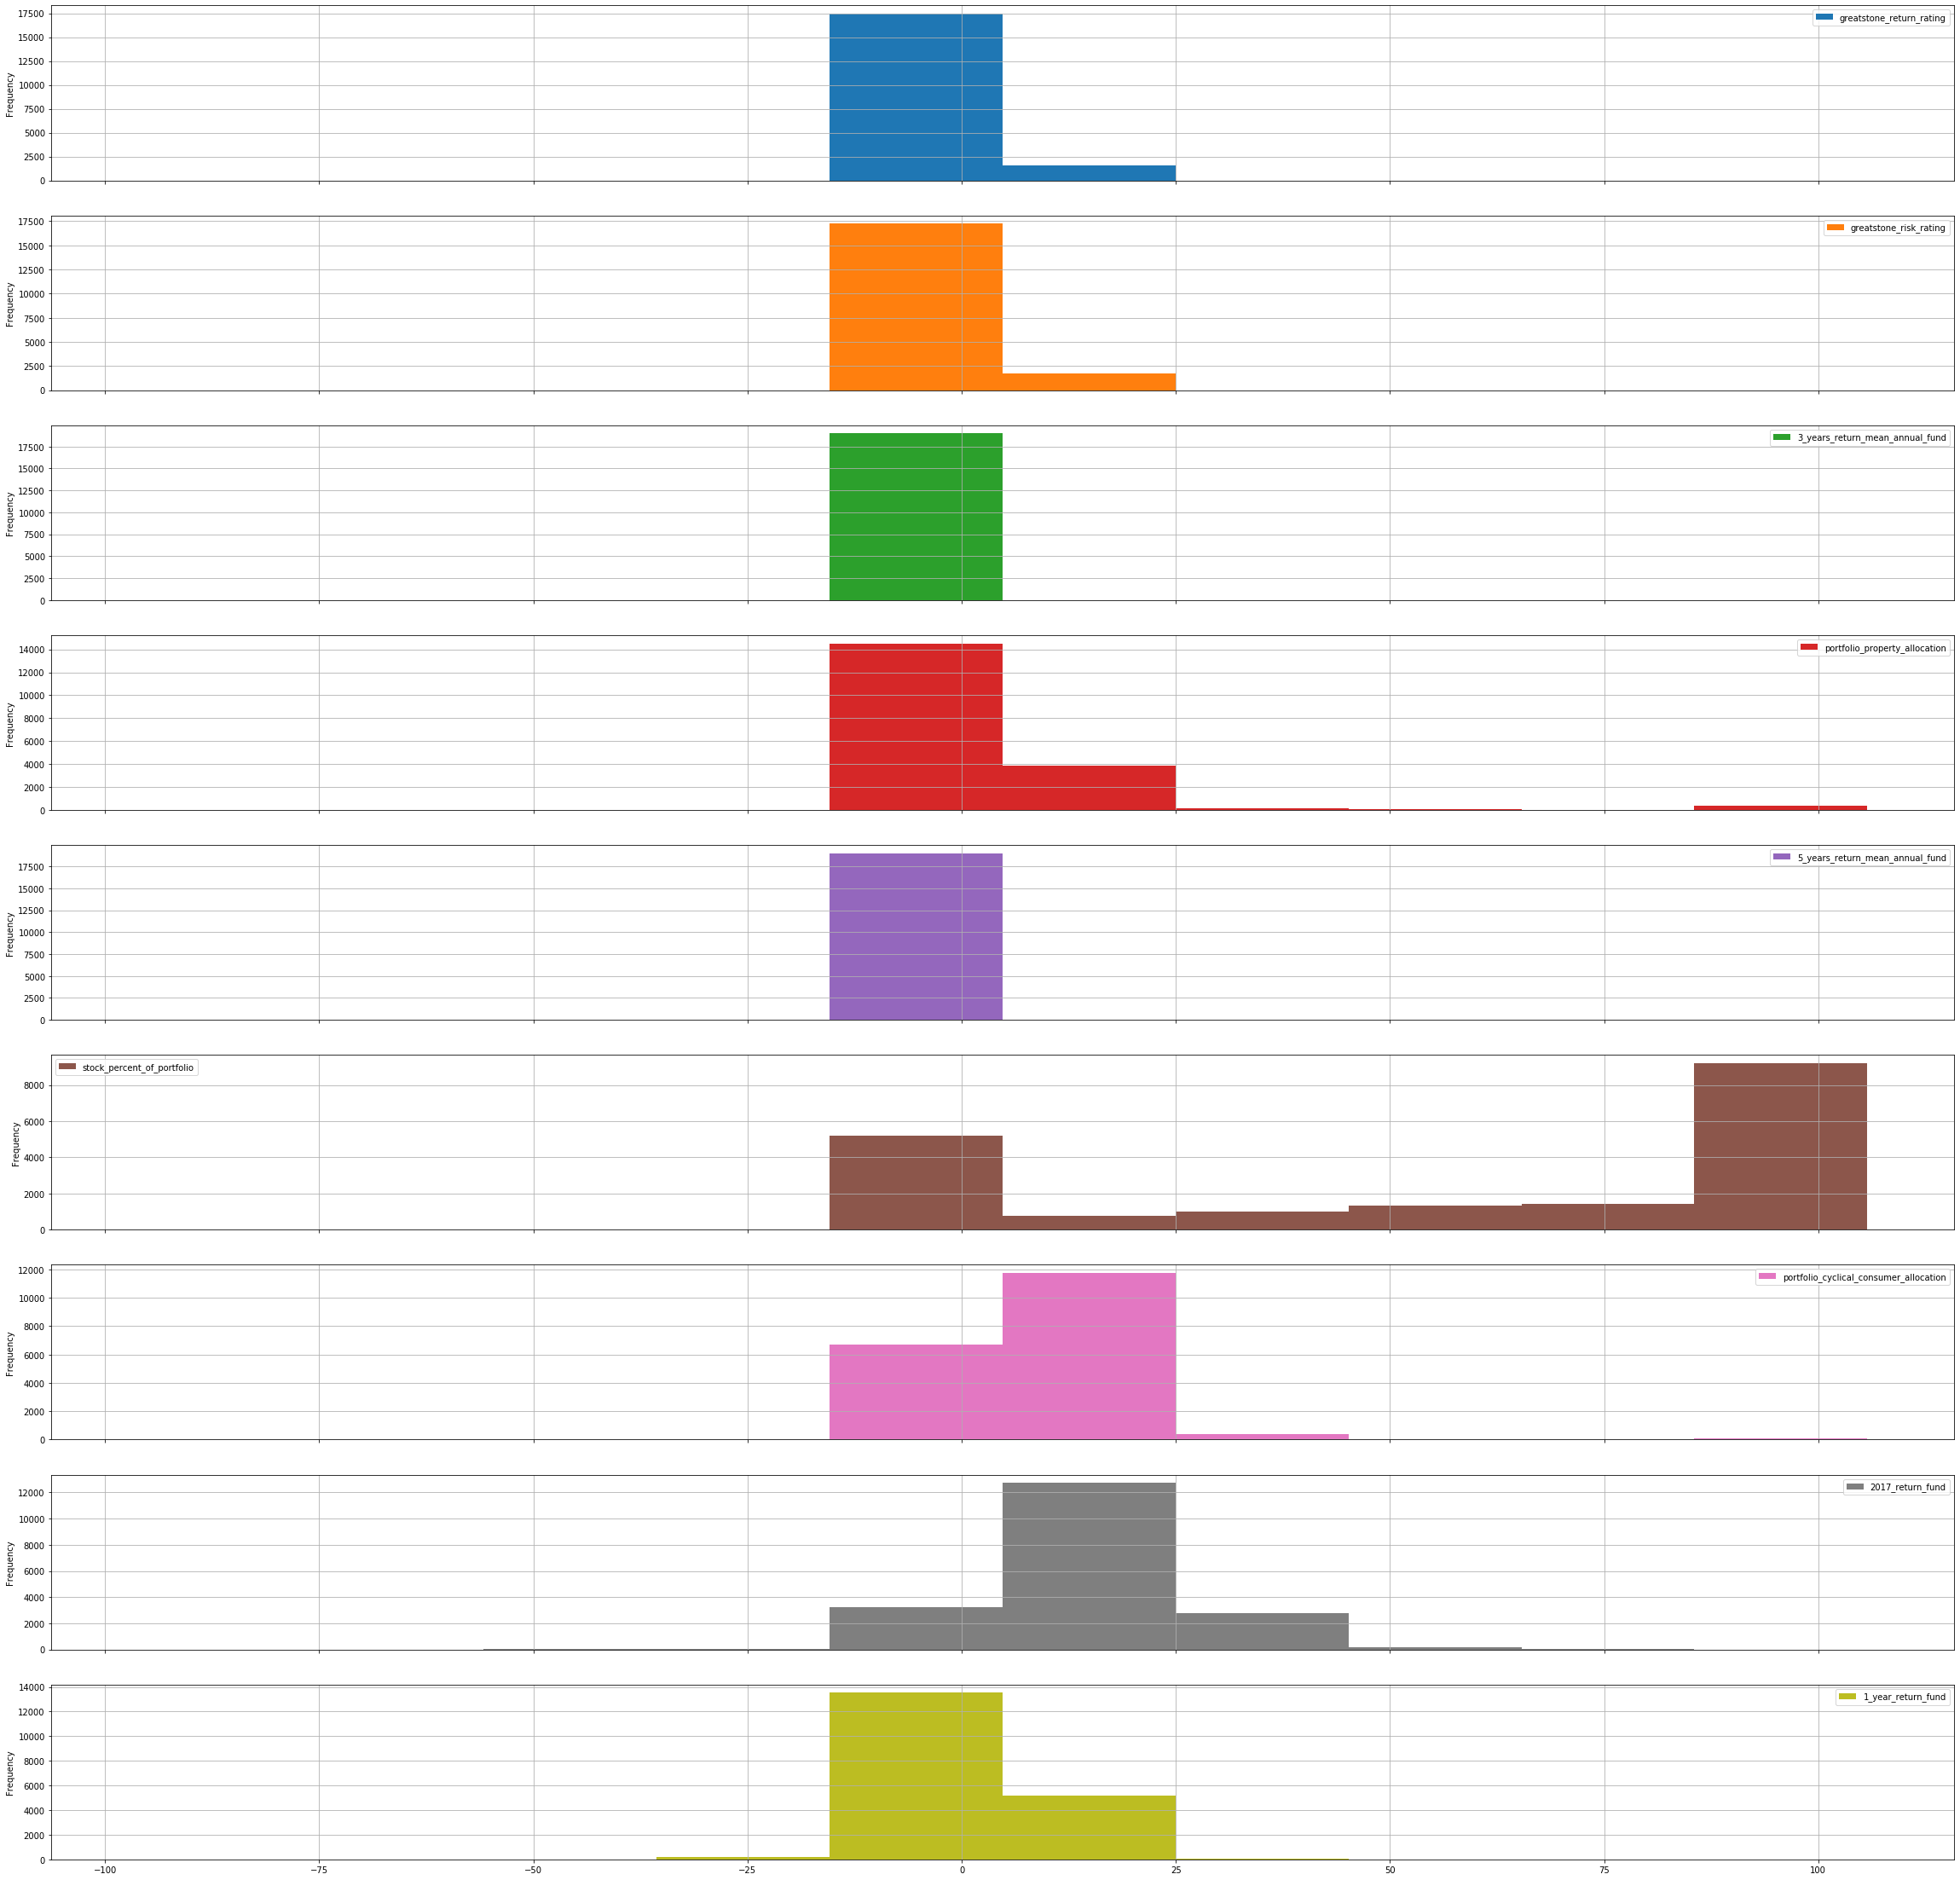

In [119]:
X_train.plot.hist( subplots = True, grid = True,figsize = (40,40))

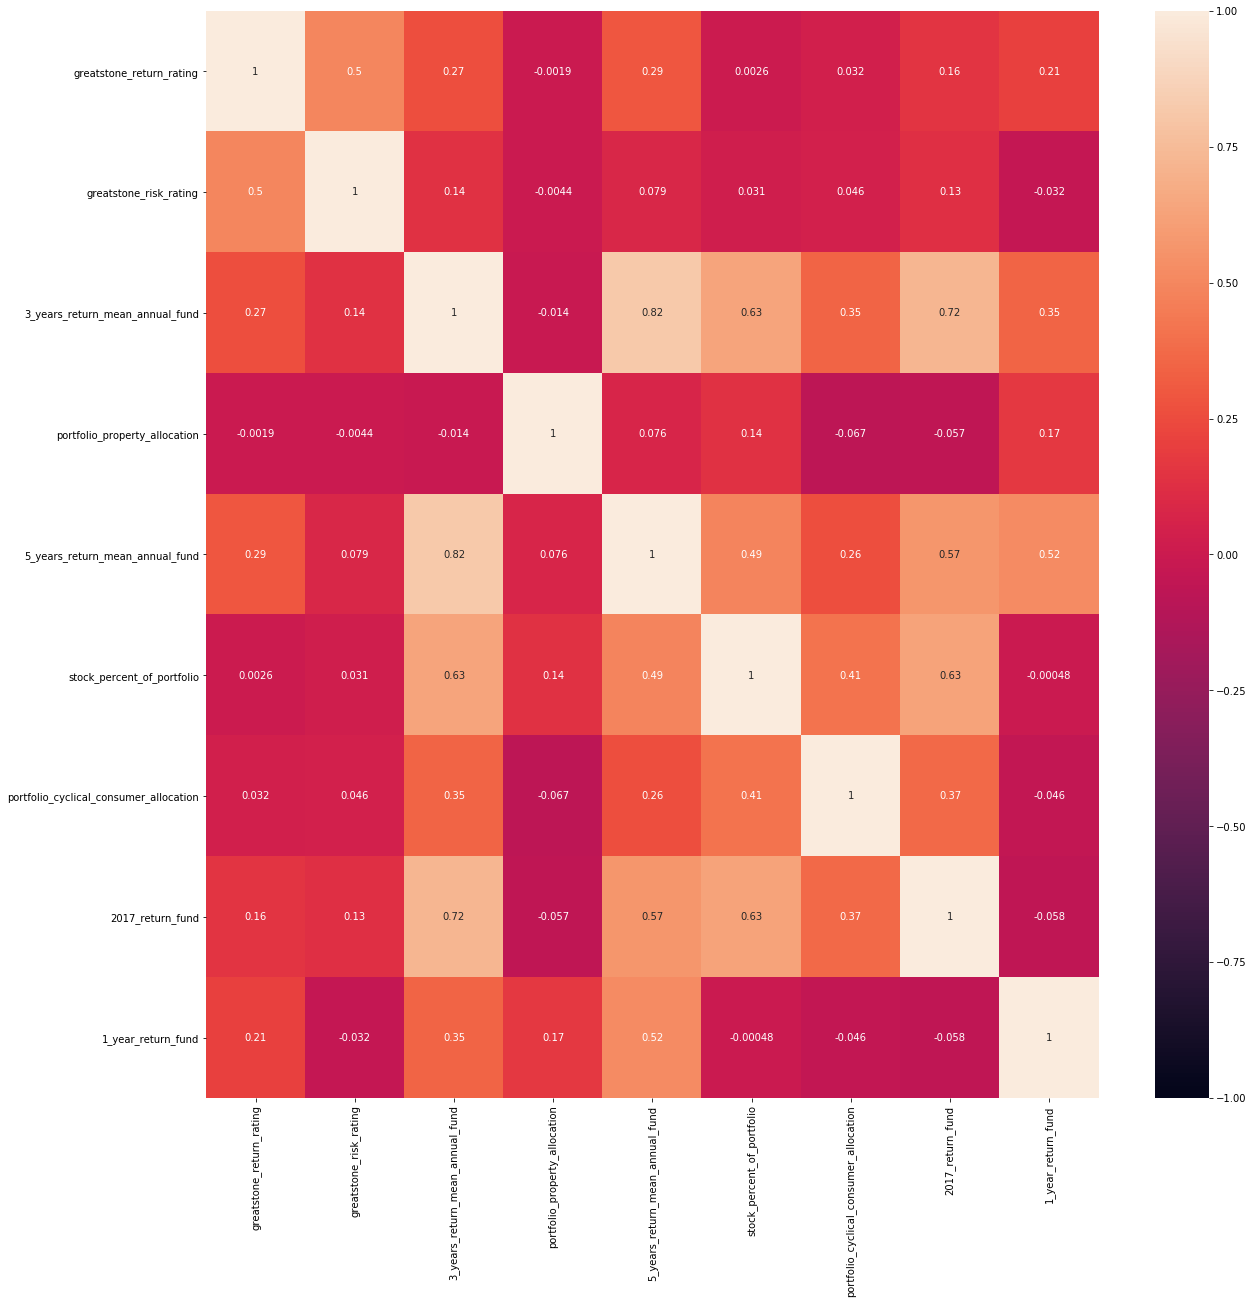

In [120]:
corr=X_train.corr() 
plt.figure(figsize=(20, 20))
sns.heatmap(corr,  vmax=1.0, vmin=-1.0, annot = True)


In [121]:
y_train =df['greatstone_rating']


In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [124]:
test_df['greatstone_rating'] = y_pred
solution = test_df[['fund_id', 'greatstone_rating']] 
solution.to_csv ('solution.csv', index = False, header=True)

In [125]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier()
abcl.fit(X_train, y_train)
y_pred = abcl.predict(X_test)

In [126]:
test_df['greatstone_rating'] = y_pred
solution = test_df[['fund_id', 'greatstone_rating']] 
solution.to_csv ('solution_a.csv', index = False, header=True)

In [127]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)


In [128]:
test_df['greatstone_rating'] = y_pred
solution = test_df[['fund_id', 'greatstone_rating']] 
solution.to_csv ('solution_b.csv', index = False, header=True)

In [129]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier()
bgcl.fit(X_train, y_train)
y_pred = bgcl.predict(X_test)


In [130]:
test_df['greatstone_rating'] = y_pred
solution = test_df[['fund_id', 'greatstone_rating']] 
solution.to_csv ('solution_c.csv', index = False, header=True)